Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'a': [1,3,2,4,3,5], 'b': [4,6,5,7,6,8]})

df.head()

,a,b
0,1,4
1,3,6
2,2,5
3,4,7
4,3,6


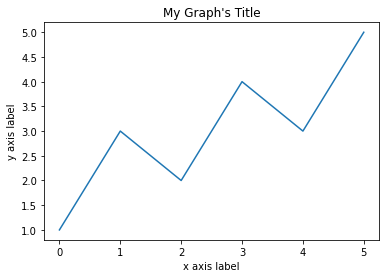

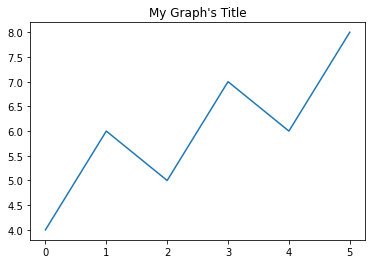

In [4]:
plt.plot(df['a'])
plt.title("My Graph's Title")
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.show()
plt.plot(df['b'])
plt.title('My Graph\'s Title')
plt.show()

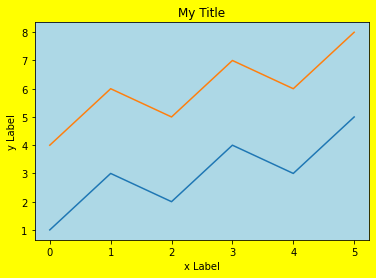

In [5]:
fig, ax = plt.subplots()

fig.set_facecolor('yellow')

ax.plot(df['a'])
ax.plot(df['b'])

ax.set_facecolor('lightblue')

ax.set_title('My Title')
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')

plt.show()

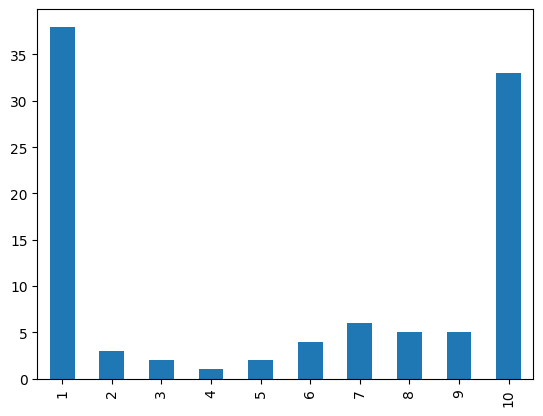

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('default')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar();

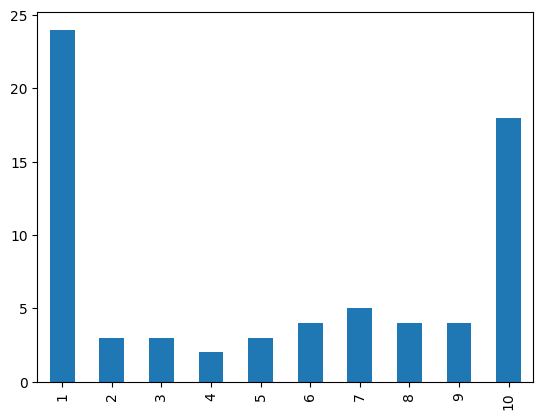

In [68]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar();

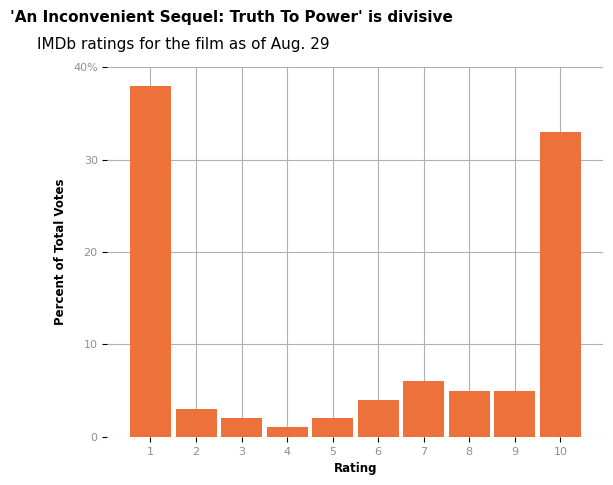

In [69]:
plt.style.use('default')

fig, ax = plt.subplots()

# figure
fig.set_facecolor('white')

# Axes style
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=0.9, zorder=3)

#Axes labels
ax.set_xlabel("Rating", fontsize=8.5, fontweight='bold')
ax.set_ylabel('Percent of Total Votes', fontsize=8.5, fontweight='bold')

# tick marks and grid lines
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0, 10, 20, 30, 40])

# tick labels
ax.set_yticklabels([0,10,20,30,'40%'], fontsize=8, color='#8f8f8f')
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10], fontsize=8, color='#8f8f8f')

# TItle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=11, x=.25, y=1.1, fontweight='bold')

ax.text(s='IMDb ratings for the film as of Aug. 29', x=-1.5, y=42, fontsize=11)

# Remove the spines 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add the grid line behind the 
ax.grid(True, zorder=0)

plt.show()

In [10]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)


In [ ]:
# Exercise 2

In [30]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/05/silver-datalab-fifabreakaway-3.png?w=575'
example = Image(url=url, width=400)

display(example)

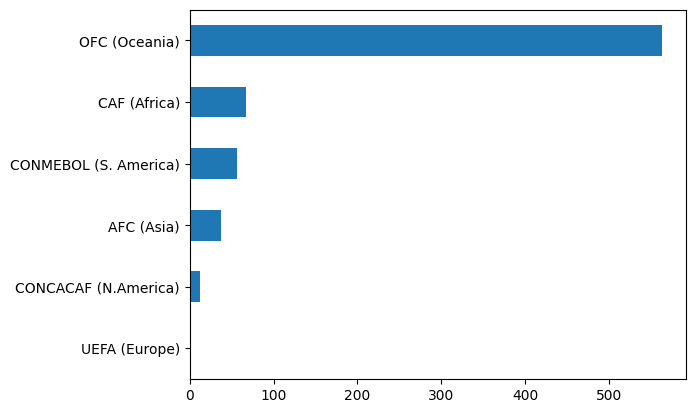

In [39]:

fake = pd.Series([0,12,37,57,67,563],
                 index=['UEFA (Europe)', 'CONCACAF (N.America)', 'AFC (Asia)', 'CONMEBOL (S. America)', 'CAF (Africa)', 'OFC (Oceania)'])




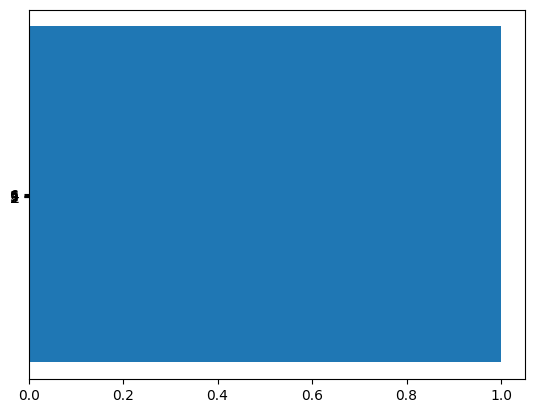

In [76]:
fake = pd.Series([0,12,37,57,67,563],
                 index=['1', '2', '3', '4', '5', '6'])
                 

fig, ax = plt.subplots()

# figure
fig.set_facecolor('white')

# Axes style
ax.barh(['1', '2', '3', '4', '5', '6'], width=1, height=fake)
plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

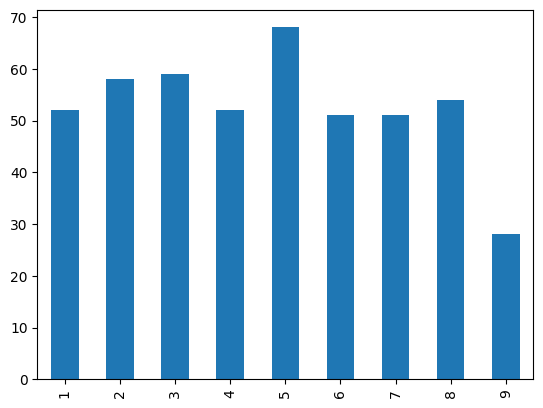

In [87]:
fake = pd.Series([52,58,59,52,68,51, 51, 54, 28],
                 index=[1, 2, 3, 4, 5, 6, 7, 8, 9])
fake.plot.bar();

In [89]:

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2020/06/hermsmeyer-cam-0630-1.png?w=575'
example = Image(url=url, width=400)

display(example)

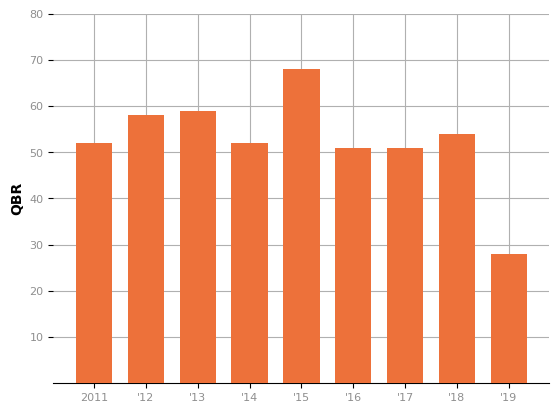

In [101]:
fig, ax = plt.subplots()

# figure
fig.set_facecolor('white')

# Axes style
ax.bar(x=[1,2,3,4,5,6,7,8,9], height=fake, color='#ED713A', width=0.7, zorder=3)

# setting y limit 
ax.set_ylim(top=80)

# setting xticks and yticks
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80])

# labels
ax.set_ylabel('QBR', fontsize = 10, fontweight = 'bold')

# title


# subtitle 


# footer 


# tick labels 
ax.set_xticklabels([2011, "'12", "'13", "'14", "'15", "'16", "'17", "'18", "'19"], fontsize= 8, color= '#8f8f8f')
ax.set_yticklabels([10, 20, 30, 40, 50, 60, 70, 80], fontsize= 8, color= '#8f8f8f')

# remove spine
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# adding grid lines
ax.grid(True, zorder=0)

plt.show()